# Phase 1: Environment Setup & Exploration

This notebook explores the Space Invaders environment and analyzes the results from our initial random agent.

## Objectives
1. Understand the environment's observation and action spaces
2. Analyze baseline (random) performance
3. Visualize sample gameplay frames
4. Establish baseline metrics for comparison

In [1]:
import gymnasium as gym
import ale_py  # Import ALE to register Atari environments
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Register ALE environments
gym.register_envs(ale_py)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports successful")
print("✓ ALE environments registered")

✓ Imports successful
✓ ALE environments registered


## 1. Environment Information

In [2]:
# Load environment info
with open('../data/phase1/environment_info.json', 'r') as f:
    env_info = json.load(f)

print("Space Invaders Environment Information")
print("=" * 50)
for key, value in env_info.items():
    if key != 'action_meanings':
        print(f"{key}: {value}")

if 'action_meanings' in env_info:
    print("\nAvailable Actions:")
    for i, action in enumerate(env_info['action_meanings']):
        print(f"  {i}: {action}")

Space Invaders Environment Information
environment: ALE/SpaceInvaders-v5
observation_shape: [210, 160, 3]
observation_dtype: uint8
action_space_size: 6
timestamp: 2025-10-27T16:47:25.061654

Available Actions:
  0: NOOP
  1: FIRE
  2: RIGHT
  3: LEFT
  4: RIGHTFIRE
  5: LEFTFIRE


## 2. Create and Test Environment

Observation shape: (210, 160, 3)
Observation dtype: uint8
Action space: Discrete(6)
Number of actions: 6


A.L.E: Arcade Learning Environment (version 0.11.2+ecc1138)
[Powered by Stella]


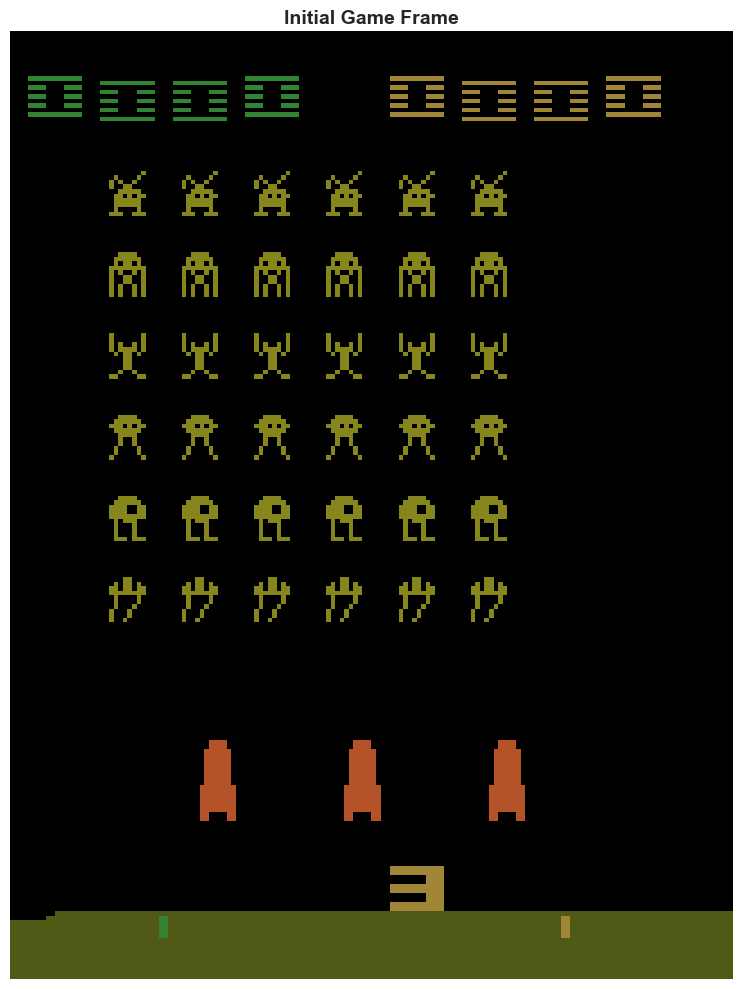

In [3]:
# Create environment
env = gym.make('ALE/SpaceInvaders-v5', render_mode='rgb_array')

# Reset and get initial observation
obs, info = env.reset()

print(f"Observation shape: {obs.shape}")
print(f"Observation dtype: {obs.dtype}")
print(f"Action space: {env.action_space}")
print(f"Number of actions: {env.action_space.n}")

# Display initial frame
plt.figure(figsize=(8, 10))
plt.imshow(obs)
plt.title('Initial Game Frame', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

env.close()

## 3. Random Agent Performance Analysis

In [4]:
# Load random agent statistics
with open('../data/phase1/random_agent_stats.json', 'r') as f:
    stats = json.load(f)

print("Random Agent Performance")
print("=" * 50)
print(f"Episodes: {stats['num_episodes']}")
print(f"Mean Reward: {stats['mean_reward']:.2f} ± {stats['std_reward']:.2f}")
print(f"Reward Range: [{stats['min_reward']:.1f}, {stats['max_reward']:.1f}]")
print(f"Mean Episode Length: {stats['mean_length']:.1f} ± {stats['std_length']:.1f}")
print(f"Length Range: [{stats['min_length']}, {stats['max_length']}]")

Random Agent Performance
Episodes: 5
Mean Reward: 119.00 ± 78.96
Reward Range: [15.0, 240.0]
Mean Episode Length: 587.4 ± 219.8
Length Range: [290, 893]


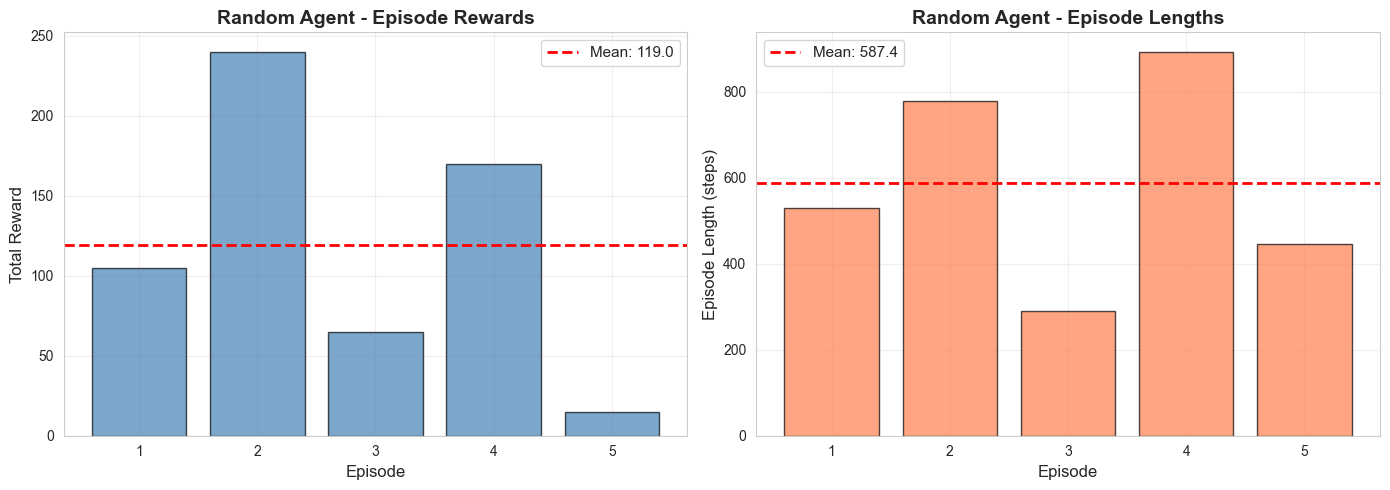

In [5]:
# Visualize performance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot rewards
episodes = range(1, len(stats['episode_rewards']) + 1)
axes[0].bar(episodes, stats['episode_rewards'], color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axhline(y=stats['mean_reward'], color='red', linestyle='--', 
                label=f'Mean: {stats["mean_reward"]:.1f}', linewidth=2)
axes[0].set_xlabel('Episode', fontsize=12)
axes[0].set_ylabel('Total Reward', fontsize=12)
axes[0].set_title('Random Agent - Episode Rewards', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot episode lengths
axes[1].bar(episodes, stats['episode_lengths'], color='coral', alpha=0.7, edgecolor='black')
axes[1].axhline(y=stats['mean_length'], color='red', linestyle='--', 
                label=f'Mean: {stats["mean_length"]:.1f}', linewidth=2)
axes[1].set_xlabel('Episode', fontsize=12)
axes[1].set_ylabel('Episode Length (steps)', fontsize=12)
axes[1].set_title('Random Agent - Episode Lengths', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Key Observations

### Environment Characteristics:
- **Observation Space**: RGB images (210x160x3)
- **Action Space**: Discrete actions (typically 6 actions)
- **Visual Input**: High-dimensional pixel data

### Random Agent Baseline:
- Establishes a baseline for comparison
- Typically achieves low scores
- Short episode lengths

### Next Steps:
1. Implement preprocessing (frame stacking, grayscale, resizing)
2. Collect more comprehensive baseline data
3. Prepare for DQN implementation

## 5. Sample Frames

Let's look at what the agent sees during gameplay:

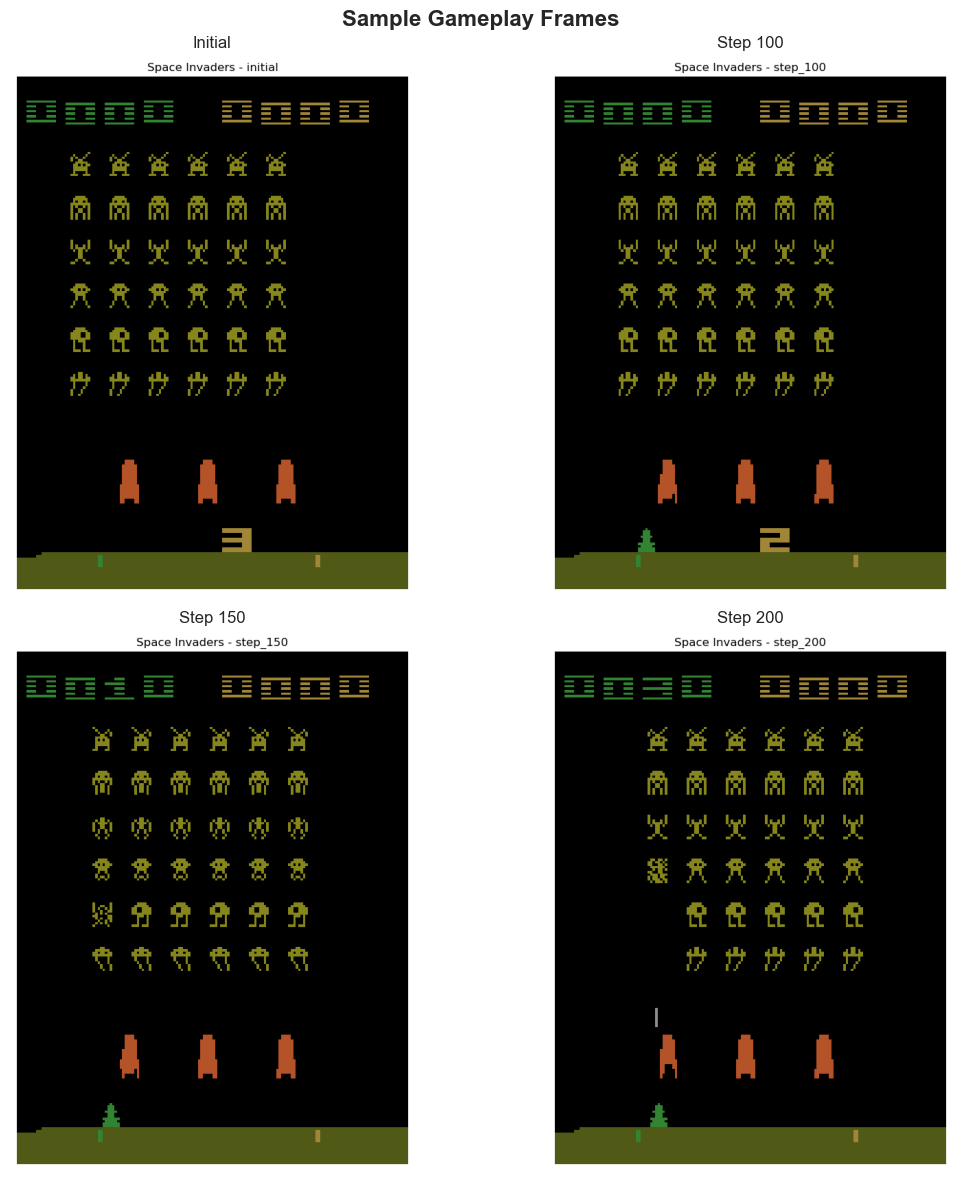

In [6]:
from PIL import Image
import glob

# Load sample frames
frame_files = sorted(glob.glob('../outputs/phase1/frames/frame_*.png'))

if len(frame_files) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    for idx, frame_file in enumerate(frame_files[:4]):
        img = Image.open(frame_file)
        axes[idx].imshow(img)
        axes[idx].set_title(Path(frame_file).stem.replace('frame_', '').replace('_', ' ').title(), fontsize=12)
        axes[idx].axis('off')
    
    plt.suptitle('Sample Gameplay Frames', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print(f"Found {len(frame_files)} frames. Run the phase1_environment_setup.py script first.")

## Summary

✅ Phase 1 Complete!

We have:
- Set up the Space Invaders environment
- Understood the observation and action spaces
- Established baseline random agent performance
- Saved sample frames for reference

**Ready for Phase 2: Data Collection & Baseline Performance**